Association Rule Learning 
- 
Apriori Algorithm

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.frequent_patterns import apriori,association_rules


In [4]:
df = pd.read_csv('./datasets/Groceries_dataset.csv')


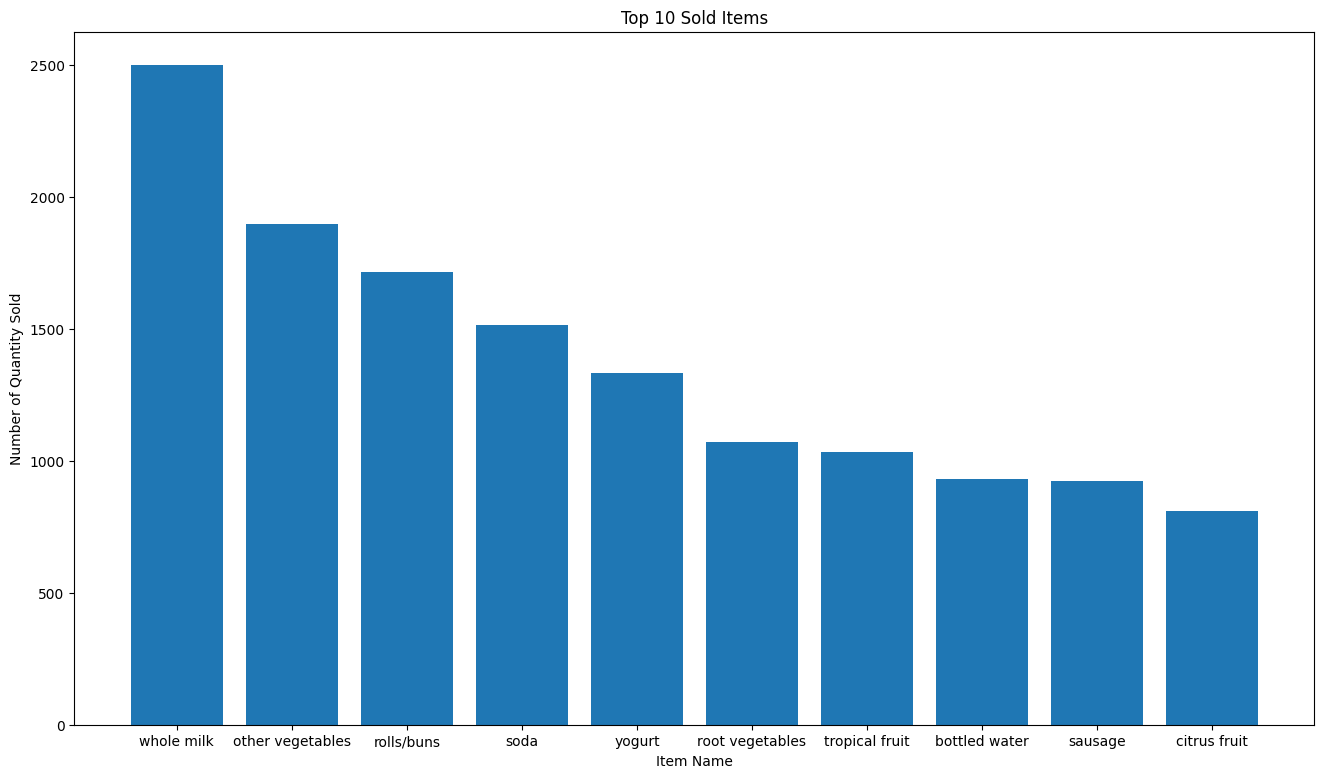

In [7]:
freq_of_items = df.groupby(by="itemDescription").size().reset_index(name='count').sort_values(by='count',ascending=False).head(10)

fig = plt.figure(figsize = (16,9))
x = np.arange(len(freq_of_items))
plt.bar(x,freq_of_items["count"])

plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

plt.xticks(x,freq_of_items['itemDescription'])
plt.show()

In [10]:
baskets = df.groupby(['Member_number','itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
baskets.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [11]:
def one_hot_encoder(k):
    if k>=1:
        return 1
    return 0

In [14]:
baskets_final = baskets.iloc[:,1:baskets.shape[1]].map(one_hot_encoder)
baskets_final

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [17]:
frequentItems = apriori(baskets_final,min_support=.025,use_colnames=True,max_len=2).sort_values(by ='support')


/media/hanzalak/Hanzala/Projects/90daysof_ml/env/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
frequentItems.head(25)


,support,itemsets
85,0.025141,"(beef, pip fruit)"
239,0.025141,"(dessert, root vegetables)"
161,0.025141,"(shopping bags, butter)"
119,0.025141,"(chocolate, bottled water)"
248,0.025141,"(shopping bags, domestic eggs)"
405,0.025141,"(sliced cheese, whole milk)"
69,0.025141,(spread cheese)
412,0.025141,"(specialty bar, whole milk)"
204,0.025398,"(pork, citrus fruit)"
302,0.025398,"(tropical fruit, margarine)"


In [23]:
rules = association_rules(frequentItems,metric ='lift',min_threshold=1,num_itemsets = 2).sort_values('lift',ascending = False)
rules = rules[['antecedents','consequents','support','confidence','lift']]
rules.head(25)

,antecedents,consequents,support,confidence,lift
6,(chocolate),(bottled water),0.025141,0.290801,1.360796
7,(bottled water),(chocolate),0.025141,0.117647,1.360796
203,(brown bread),(shopping bags),0.031042,0.228302,1.356587
202,(shopping bags),(brown bread),0.031042,0.184451,1.356587
384,(pastry),(pip fruit),0.041047,0.231214,1.355296
385,(pip fruit),(pastry),0.041047,0.240602,1.355296
42,(soda),(beverages),0.026167,0.083470,1.344483
43,(beverages),(soda),0.026167,0.421488,1.344483
346,(fruit/vegetable juice),(root vegetables),0.038738,0.310062,1.344405
347,(root vegetables),(fruit/vegetable juice),0.038738,0.167964,1.344405
